In [2]:
import pandas as pd
from sklearn import preprocessing
data_test = pd.read_csv("C:/Users/85059/Desktop/DATA7703 Machine Learning/Assignment/penguins_size.csv").dropna()
data_test.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [12]:
X = data_test.iloc[:,4:6].values # 横的全要，竖的只要第四第五列
y = data_test["species"]
print(set(y)) # 输出这个数据集中有几个不同的class
le = preprocessing.LabelEncoder()
le.fit(y)
le.classes_
y_labels = le.transform(y)
print(y_labels[:10]) # label是Adelie(?)的自动转换为0

{'Gentoo', 'Chinstrap', 'Adelie'}
[0 0 0 0 0 0 0 0 0 0]


0     Adelie
1     Adelie
2     Adelie
4     Adelie
5     Adelie
6     Adelie
7     Adelie
12    Adelie
13    Adelie
14    Adelie
Name: species, dtype: object

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1235)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) # Perform standardization by centering and scaling
X_test = scaler.transform(X_test)

In [10]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
kmeans.labels_
preditions = kmeans.predict(X_test) # 把fit后的模型来预测测试集的结果
cluster_centers = kmeans.cluster_centers_
preditions
cluster_centers

In [9]:
print(X[0])

[ 181. 3750.]


d:\Python3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


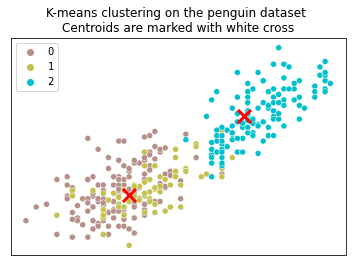

In [15]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
# plt.figure(1)
# plt.clf()

# plt.scatter(X[:,0], X[:,1], marker="x")
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_

color_palette = sns.color_palette(['#b58f88', '#c4c14d', '#00c0cd'])
cmap = ListedColormap(color_palette.as_hex())

sns.scatterplot(X[:,0], X[:,1], hue=y_labels, palette=cmap) # X[:,0]当x，X[:,1]当y
plt.scatter(
    centroids[:,0],
    centroids[:,1],
    marker="x",
    s=169,
    linewidths=3,
    color="red",
    zorder=10,
)
color_palette = sns.color_palette(['#b58f88', '#c4c14d', '#00c0cd'])
cmap = ListedColormap(color_palette.as_hex())
plt.title(
    "K-means clustering on the penguin dataset \n"
    "Centroids are marked with white cross"
)
# plt.xlim(np.amin(X), np.amax(X)) gives the minimum & maximum value of this array
# plt.ylim(np.amin(y), np.amax(y))
# 如果是np.argmin那么就会返回这个array里最小值所在的index
plt.xticks(())
plt.yticks(())
plt.show()